In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor # 딥러닝 neural_network
from sklearn.metrics import r2_score# 선형 모델(Linear Models)

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')


In [44]:
df = pd.read_csv( '../data/data-01.csv', header=None)
df.columns =['q1','q2','midterm','final']
df.head()

,q1,q2,midterm,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [8]:
# 특성 데이터는 매트릭스 구조로 줘야함
# 사용하고자하는 컬럼만 추출
x_data = df[['q1','q2','midterm']]
x_data.head()

,q1,q2,midterm
0,73,80,75
1,93,88,93
2,89,91,90
3,96,98,100
4,73,66,70


In [43]:
y_data = df['final']

In [13]:
# 모델 적용, 학습
model_lr = LinearRegression()
model_lr.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# w1,w2,w3 각 변수에 대한 기울기 
model_lr.coef_

array([0.35593822, 0.54251876, 1.16744422])

In [16]:
# b
model_lr.intercept_

-4.336102401240339

In [19]:
# q1:70점, q2:75점, midterm : 75점인 경우 예측값
model_lr.coef_[0] * 70 + model_lr.coef_[1] * 75 + model_lr.coef_[2]*75 + model_lr.intercept_

148.82679594765654

In [21]:
# q1:70점, q2:75점, midterm : 75점인 경우 예측값
# np.matmul ([[70,75,75]],model_lr.coef_.reshape(-1,1)) + model_lr.intercept_ 을 수행하는것과 동일
model_lr.predict([[70,75,75]])

array([148.82679595])

In [31]:
# 주어진 데이터는 1x3
# 곱해지는 데이터는 1x3이기 때문에 행렬곱을 하기 위해 .reshape(-1,1), .T
np.matmul ([[70,75,75]], model_lr.coef_.T) + model_lr.intercept_

array([148.82679595])

In [32]:
# q1:60점 q2:55점 midterm:65 
# q1:90점 q2:85점 midterm:95  인경우 예측값을 구하시요

In [38]:
np1 = np.matmul([[60,55,65]], model_lr.coef_.T) + model_lr.intercept_
np2 = np.dot([[90,85,95]], model_lr.coef_.T) + model_lr.intercept_

print(np1[0])
print(np2[0])

122.74259644584203
184.7196322227244


In [54]:
model_lr.predict([[70,75,75],[90,85,95]])

array([148.82679595, 184.71963222])

In [53]:
# 결정계수값 r2
model_lr.score(x_data, y_data)

0.9896615789448399

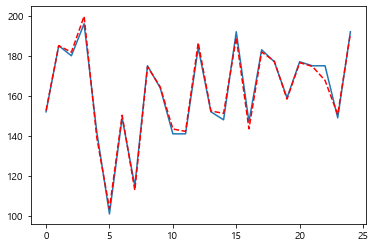

In [58]:
plt.plot(y_data) # 실제값
plt.plot(model_lr.predict(x_data),'r--') # 예측값
plt.show()

### 보스턴 데이터셋

In [63]:
# 딕셔너리 구조
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [64]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [65]:
## boston을 데이터프레임으로 만들기
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['MEDV'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [66]:
# 13개의 특성데이터와 1개의 라벨데이터로 구성
len(boston_df.columns)

14

In [68]:
# 특성데이터와 라벨데이터를 나눔
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [71]:
# 데이터를 분할 8:2로, random_state => seed

x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [79]:
print(x_train.shape, x_test.shape)


(404, 13) (102, 13)


## LinearRegression()

In [80]:
modelBoston = LinearRegression()
modelBoston.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
# 데이터 r2 스코어 확인
# 훈련데이터 결정계수보다 테스트데이터의 결정계수가 현저히 낮으면 과적합 의심

print('훈련데이터 R2 : ',modelBoston.score(x_train, y_train))
print('테스트데이터 R2 : ',modelBoston.score(x_test, y_test))

훈련데이터 R2 :  0.7293585058196337
테스트데이터 R2 :  0.7634174432138487


In [84]:
# 예측값
modelBoston.predict([x_test.iloc[0]])

array([32.65503184])

### 학습에 의한 방법 SGDRegressor

In [114]:
# 모델 적용
modelSGD = SGDRegressor(max_iter=5000, alpha=0.0001,
                         early_stopping= True)
modelSGD.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [115]:
# R2 스코어 확인
modelSGD.score(x_train, y_train)

0.7182914767286461

In [116]:
y1_predict = modelSGD.predict(x_train)
r2_score(y_train, y1_predict)

0.7182914767286461

In [120]:
# 예측값
modelSGD.predict([x_test[0]])

array([31.03179599])

### 딥러닝 MLPRegressor

In [124]:
modelNN = MLPRegressor(max_iter=5000, alpha=0.001,
                        solver='adam',
                         hidden_layer_sizes= (100,10))
modelNN.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [125]:
y2_predict = modelNN.predict(x_train)
r2_score(y_train, y2_predict)

0.8601159545219007

In [126]:
# 예측값
modelNN.predict([x_test[0]])

array([29.03654673])

#### multi 특성데이터가 다중인 경우
- 1. 정규화
- 2. 다중공선성(상관관계)

### 정규화 작업

In [107]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [109]:
scaleX = StandardScaler()
x_dataS = scaleX.fit_transform(x_data)

In [112]:
x_dataS.shape

(506, 13)

In [113]:
x_train, x_test, y_train, y_test=train_test_split(x_dataS, y_data, test_size=0.2, random_state=1)

In [127]:
x_test[0]

array([-0.41477789,  0.92862338, -1.30687771, -0.27259857, -0.71434722,
        0.80402837,  0.0613455 , -0.29108882, -0.29308074, -1.10611514,
       -0.02567665,  0.44105193, -0.71811916])

In [130]:
[x_data.iloc[0]]

[CRIM         0.00632
 ZN          18.00000
 INDUS        2.31000
 CHAS         0.00000
 NOX          0.53800
 RM           6.57500
 AGE         65.20000
 DIS          4.09000
 RAD          1.00000
 TAX        296.00000
 PTRATIO     15.30000
 B          396.90000
 LSTAT        4.98000
 Name: 0, dtype: float64]

In [128]:
xx = scaleX.transform( [x_data.iloc[0]] )
modelNN.predict(xx )

array([28.9198738])

In [129]:
x_data.iloc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64